# Augmentation

We have already mentioned (and even used) previously the concept of augmentation, i.e. modifying the images of the training set to force a network to learn a more general view of the data. Until now we have only used the torchvision package. Here we introduce ```Albumentations``` a package specifically dedicated to augmentation, in particular useful when we deal with segmentation.

In [1]:
# set path containing data folder or use default for Colab (/gdrive/My Drive)
local_folder = "../"
import urllib.request
urllib.request.urlretrieve('https://raw.githubusercontent.com/guiwitz/DLImaging/master/utils/check_colab.py', 'check_colab.py')
from check_colab import set_datapath
colab, datapath = set_datapath(local_folder)

In [21]:
import albumentations as A
import numpy as np

## Creating augmentations

The logic of albumentations, is very close to that of torchvision: we have a collection of transformations we can apply to images and we can compose them. The library works for numpy as arrays, so let's import an example of the nuclei dataset:

In [7]:
import imageio.v3 as iio
import matplotlib.pyplot as plt

In [11]:
image = iio.imread(datapath.joinpath('data/nuclei/BBBC006_v1_images_z_16/mcf-z-stacks-03212011_a01_s1_w1248254b0-0193-4e11-8762-62b5d2b86216.tif'))  
                   

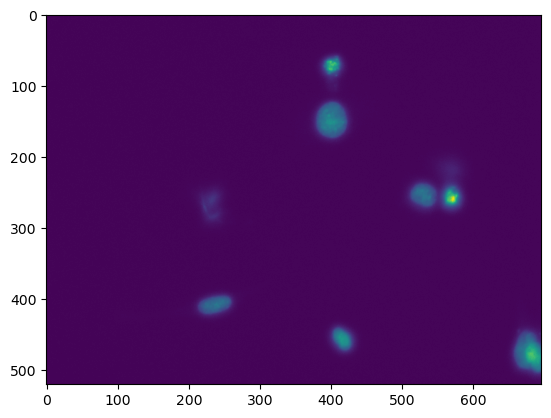

In [12]:
plt.imshow(image);

Now we create our composite transform:

In [14]:
transform = A.Compose([
    A.RandomCrop(width=256, height=256),
    A.HorizontalFlip(p=0.5),
    A.RandomBrightnessContrast(p=0.2),
])

and apply it to an image:

In [24]:
augmented = transform(image=image)
augmented

{'image': array([[115, 123, 122, ..., 122, 118, 123],
        [117, 122, 119, ..., 121, 123, 120],
        [117, 118, 121, ..., 118, 119, 120],
        ...,
        [123, 120, 124, ..., 120, 119, 123],
        [124, 125, 117, ..., 113, 124, 121],
        [117, 128, 127, ..., 122, 112, 121]], dtype=uint16)}

The output is a dictionary, which at this moment only contains the transformed image. We can apply the same transformation a few times to visualize the effect: 

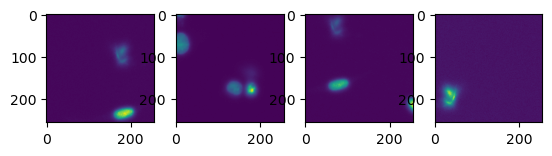

In [25]:
fig, axes = plt.subplots(1,4)
for ax in axes.ravel():
    ax.imshow(transform(image=image)['image'])

## Augmentation for segmentation

As long as we train a classification networks, we only have to take care of the images as the target is just a label. However when we perform segmentation, the target is a labeled image, and hence we need to apply the same transformation to both images and labels. This is very easy with Albumentations as we can pass two images to a transform:

In [29]:
mask = iio.imread(datapath.joinpath('data/nuclei/BBBC006_v1_labels/mcf-z-stacks-03212011_a01_s1.png'))  


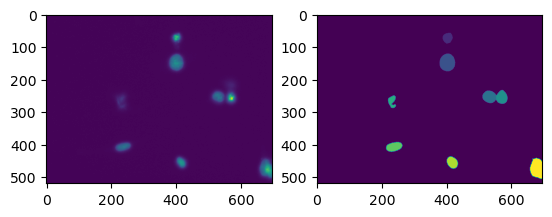

In [32]:
fig, ax = plt.subplots(1,2)
ax[0].imshow(image)
ax[1].imshow(mask[0]);

In [38]:
augmented = transform(image=image, mask=mask[0])

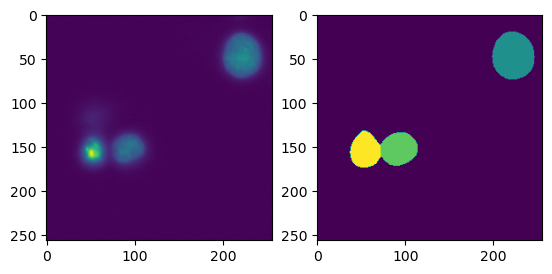

In [39]:
fig, ax = plt.subplots(1,2)
ax[0].imshow(augmented['image'])
ax[1].imshow(augmented['mask']);